In [14]:
#import dependencies 
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import cv2 as cv
import random
from PIL import Image
from keras.preprocessing import image
#from tensorflow.keras.applications import VGG16


Investigating a Single Image from the Dataset

In [3]:
#investigate a single image from positive dataset
pos_path = '/dataset/train/POSITIVE/'
def load_image(path):
    for img in os.listdir(pos_path):
        print('Image name =', img)
        image = cv.imread(os.path.join(pos_path, img))
        break

    return image

Image name = Positive_163_Coronary_221_LAD_Secondary2_18.png
The dimensions are 299 pixels height and 299 pixels width
The maximum pixel value is 163.0000
The minimum pixel value is 0.0000
The mean value of the pixels is 62.3081
The standard deviation is 43.2523


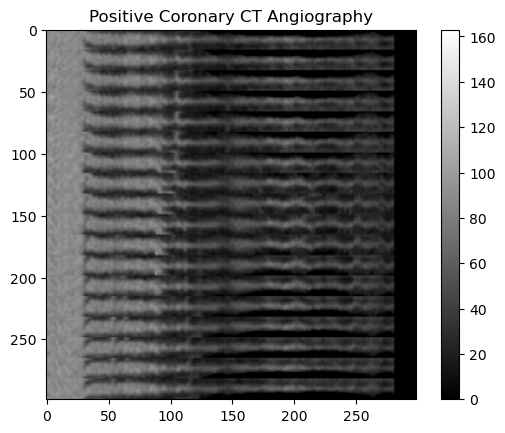

In [4]:
pos_path = './dataset/train/POSITIVE/'

image = load_image(pos_path)
plt.imshow(image, cmap='gray')
plt.colorbar()
plt.title('Positive Coronary CT Angiography')
print(f"The dimensions are {image.shape[0]} pixels height and {image.shape[1]} pixels width")
print(f"The maximum pixel value is {image.max():.4f}")
print(f"The minimum pixel value is {image.min():.4f}")
print(f"The mean value of the pixels is {image.mean():.4f}")
print(f"The standard deviation is {image.std():.4f}")


In [5]:
#investigate a single image from negative dataset
neg_path = '/dataset/train/NEGATIVE/'
def load_image(path):
    for img in os.listdir(neg_path):
        print('Image name =', img)
        image = cv.imread(os.path.join(neg_path, img))
        break

    return image

Image name = Negative_105_Coronary_015_RCA_Secondary2_1.png
The dimensions are 299 pixels height and 299 pixels width
The maximum pixel value is 104.0000
The minimum pixel value is 0.0000
The mean value of the pixels is 36.9210
The standard deviation is 35.8445


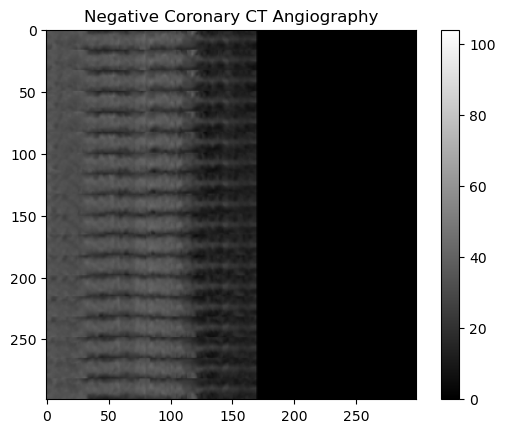

In [6]:
neg_path = './dataset/train/NEGATIVE/'

image = load_image(neg_path)
plt.imshow(image, cmap='gray')
plt.colorbar()
plt.title('Negative Coronary CT Angiography')
print(f"The dimensions are {image.shape[0]} pixels height and {image.shape[1]} pixels width")
print(f"The maximum pixel value is {image.max():.4f}")
print(f"The minimum pixel value is {image.min():.4f}")
print(f"The mean value of the pixels is {image.mean():.4f}")
print(f"The standard deviation is {image.std():.4f}")


In [15]:
train_dir = 'dataset/train/'
pos_imgs = [fn for fn in os.listdir(f'{train_dir}/POSITIVE') if fn.endswith('.png')]
neg_imgs = [fn for fn in os.listdir(f'{train_dir}/NEGATIVE') if fn.endswith('.png')]

In [16]:
select_pos = np.random.choice(pos_imgs, 3, replace = False)
select_neg = np.random.choice(neg_imgs, 3, replace = False)

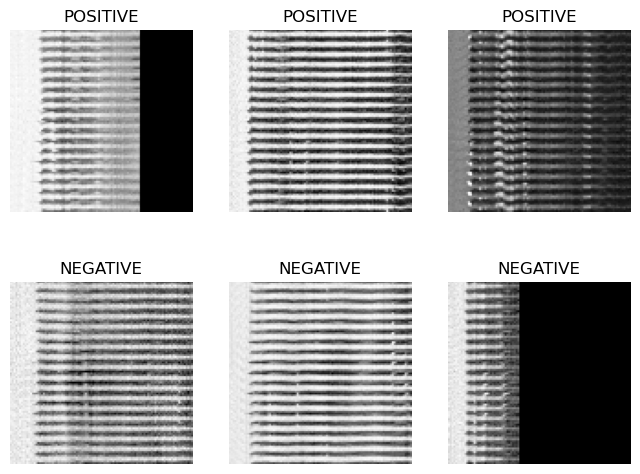

In [19]:
# plotting 2 x 3 image matrix
fig = plt.figure(figsize = (8,6))
for i in range(6):
    if i < 3:
        fp = f'{train_dir}/POSITIVE/{select_pos[i]}'
        label = 'POSITIVE'
    else:
        fp = f'{train_dir}/NEGATIVE/{select_neg[i-3]}'
        label = 'NEGATIVE'
    ax = fig.add_subplot(2, 3, i+1)
    
    # to plot without rescaling, remove target_size
    fn = image.load_img(fp, target_size = (100,100), color_mode='grayscale')
    plt.imshow(fn, cmap='Greys_r')
    plt.title(label)
    plt.axis('off')

Loading Images and Labels Together and Resizing Images

In [20]:
#load the path of the train images
path = 'dataset/train/'
train = os.listdir(path)

In [21]:
#there are two folders in the train dataset, positive and negative
folders=[]
folders=[f for f in sorted(os.listdir(path)) if not f.startswith('.')]
print(folders)

['Negative', 'Positive']


In [22]:
labels = folders
print (f'The labels are {labels}') 

#setting the size of images we want
image_size = 100
print(f'All images to be resized into {image_size}x{image_size} pixels')


The labels are ['Negative', 'Positive']
All images to be resized into 100x100 pixels


In [23]:
# defining a function to load images and labels together
# this function will also resize the images

def load_train(path):
    
    images = []
    labels = []
    
    for label_enum, label in enumerate(folders):
        direc = os.path.join(path, label)
        #class_num = labels.index(label)
        
        for image_name in os.listdir(direc):
            image_path = os.path.join(direc, image_name)
            image_read = cv.imread(image_path,cv.IMREAD_GRAYSCALE)
            image_resized = cv.resize(image_read,(image_size,image_size))
            images.append(image_resized)
            labels.append(label_enum)
            
    return np.stack(images), np.array(labels)

In [24]:
#load all the training images to train_images
#train_images = load_train(path)
train_images, train_labels = load_train(path)

print(f'Shape of the training images = {train_images.shape}')
print(f'Shape of the training labels = {train_labels.shape}')

Shape of the training images = (4668, 100, 100)
Shape of the training labels = (4668,)


Number of NEGATIVE  images = 2304
Number of POSITIVE images = 2364


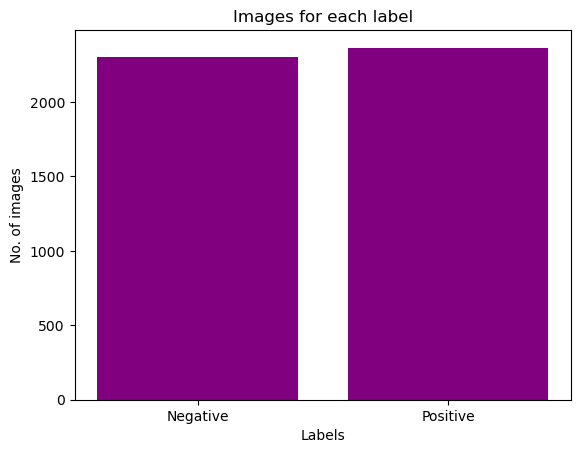

In [25]:
# checking the number of images of each class

a = 0
b = 0

for label in train_labels:
    if label == 0:
        a += 1
    if label == 1:
        b += 1
        
print (f'Number of NEGATIVE  images = {a}')
print (f'Number of POSITIVE images = {b}')

# plotting the data

x_plot = [i for i, _ in enumerate(labels)]
numbers = [a,b]
plt.bar(x_plot,numbers,color = 'purple')
plt.xlabel("Labels")
plt.ylabel("No. of images")
plt.title("Images for each label")

plt.xticks(x_plot, labels)

plt.show()